In [1]:
# https://deeplearningcourses.com/c/advanced-computer-vision
# https://www.udemy.com/advanced-computer-vision
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future



In [2]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
# helper
def y2indicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I



In [4]:
# get the data
# https://www.kaggle.com/zalando-research/fashionmnist
data = pd.read_csv('../large_files/fashionmnist/fashion-mnist_train.csv')
data = data.values
np.random.shuffle(data)

X = data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
Y = data[:, 0].astype(np.int32)

# get shapes
# N = len(Y)
K = len(set(Y))

# by default Keras wants one-hot encoded labels
# there's another cost function we can use
# where we can just pass in the integer labels directly
# just like Tensorflow / Theano
Y = y2indicator(Y)




# make the CNN
i = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=(3, 3))(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=64, kernel_size=(3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(units=100)(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=K)(x)
x = Activation('softmax')(x)



In [30]:
model = Model(inputs=i, outputs=x)


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# note: multiple ways to choose a backend
# either theano, tensorflow, or cntk
# https://keras.io/backend/


In [31]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=32)
print("Returned:", r)

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())



Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 34s 851us/step - loss: 0.5386 - accuracy: 0.8066 - val_loss: 0.3629 - val_accuracy: 0.8714
Epoch 2/15
40199/40199 [==============================] - 35s 869us/step - loss: 0.3814 - accuracy: 0.8638 - val_loss: 0.3155 - val_accuracy: 0.8872
Epoch 3/15
40199/40199 [==============================] - 34s 841us/step - loss: 0.3378 - accuracy: 0.8770 - val_loss: 0.2971 - val_accuracy: 0.8910
Epoch 4/15
40199/40199 [==============================] - 40s 985us/step - loss: 0.3103 - accuracy: 0.8896 - val_loss: 0.2794 - val_accuracy: 0.8993
Epoch 5/15
40199/40199 [==============================] - 50s 1ms/step - loss: 0.2905 - accuracy: 0.8946 - val_loss: 0.2694 - val_accuracy: 0.9019
Epoch 6/15
40199/40199 [==============================] - 44s 1ms/step - loss: 0.2762 - accuracy: 0.8985 - val_loss: 0.2894 - val_accuracy: 0.8942
Epoch 7/15
40199/40199 [==============================] - 43

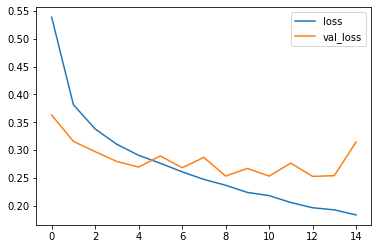

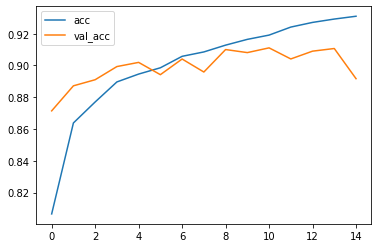

In [32]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
